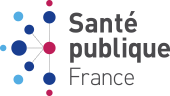

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

In [2]:
df = pd.read_csv('openfoodfacts.csv', sep=',') 

In [3]:
df.head(3)

product_name  fat_100g  sugars_100g  \
0    Bridelight 3% Les carrés fondants goût Emmental       3.0          8.5   
1                                100 % Pur Jus Pomme       0.0          9.7   
2                                  18 marrons glacés       0.8         56.0   

   energy_100g  carbohydrates_100g  saturated-fat_100g  fiber_100g  \
0        477.0                 8.5                 2.0         0.0   
1        179.0                10.0                 0.0         0.0   
2       1378.0                76.0                 0.1         4.8   

   proteins_100g  salt_100g  cat pnns            pnns_groups_1  \
0           13.0   2.000000         6  Milk and dairy products   
1            0.5   0.030000         0                Beverages   
2            0.8   0.050038         8            Sugary snacks   

  nutrition_grade_fr  
0                  C  
1                  C  
2                  C

In [4]:
df.describe()

fat_100g   sugars_100g   energy_100g  carbohydrates_100g  \
count  42521.000000  42521.000000  42521.000000        42521.000000   
mean      10.815407     12.033440    946.734692           24.656632   
std       14.621819     14.926501    744.034843           24.516049   
min        0.000000      0.000000      0.000000            0.000000   
25%        1.500000      1.700000    328.000000            7.050000   
50%        4.000000      9.000000    681.000000           11.000000   
75%       16.000000     13.000000   1509.000000           44.000000   
max      100.000000     88.700000   3770.000000           93.000000   

       saturated-fat_100g    fiber_100g  proteins_100g     salt_100g  \
count        42521.000000  42521.000000   42521.000000  42521.000000   
mean             3.929371      0.923987       7.386078      0.744422   
std              5.877531      1.777129       6.177721      0.725331   
min              0.000000      0.000000       0.000000      0.000000   
25%              0.400000      0.000000       3.000000      0.070000   
50%              1.000000      0.000000       6.750000      0.750000   
75%              4.300000      1.200000       9.000000      1.015000   
max             39.600000     11.800000      40.000000      4.900000   

           cat pnns  
count  42521.000000  
mean       3.687707  
std        3.011049  
min       -1.000000  
25%        1.000000  
50%        4.000000  
75%        6.000000  
max        8.000000

In [5]:
df.columns

Index(['product_name', 'fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'cat pnns', 'pnns_groups_1',
       'nutrition_grade_fr'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42521 entries, 0 to 42520
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_name        42521 non-null  object 
 1   fat_100g            42521 non-null  float64
 2   sugars_100g         42521 non-null  float64
 3   energy_100g         42521 non-null  float64
 4   carbohydrates_100g  42521 non-null  float64
 5   saturated-fat_100g  42521 non-null  float64
 6   fiber_100g          42521 non-null  float64
 7   proteins_100g       42521 non-null  float64
 8   salt_100g           42521 non-null  float64
 9   cat pnns            42521 non-null  int64  
 10  pnns_groups_1       38827 non-null  object 
 11  nutrition_grade_fr  42521 non-null  object 
dtypes: float64(8), int64(1), object(3)
memory usage: 3.9+ MB


# Analyse Univariée


In [7]:
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as st

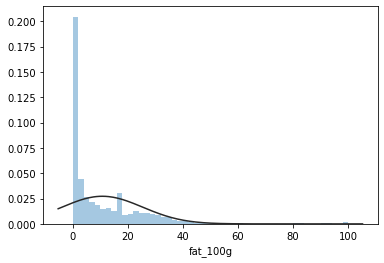

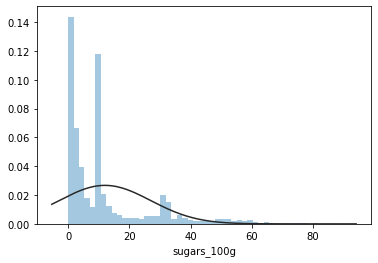

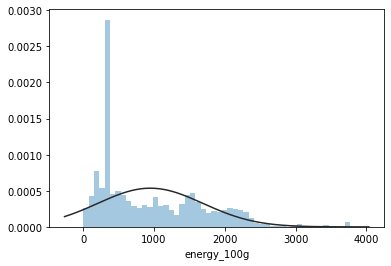

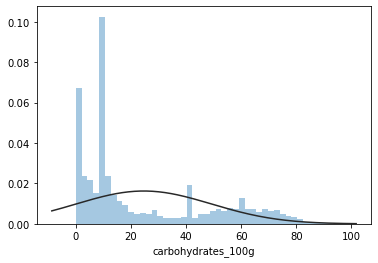

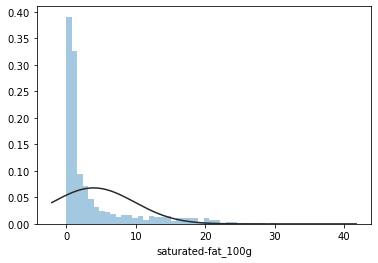

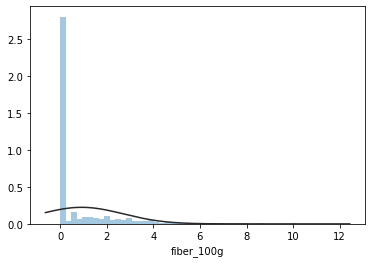

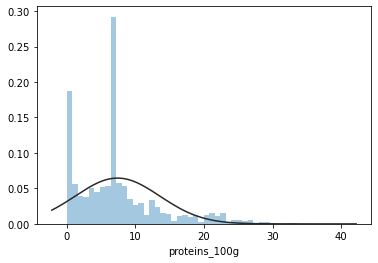

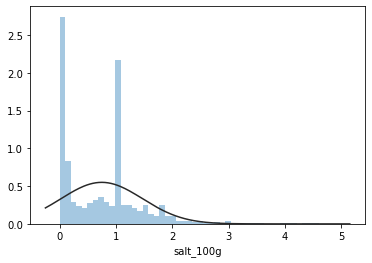

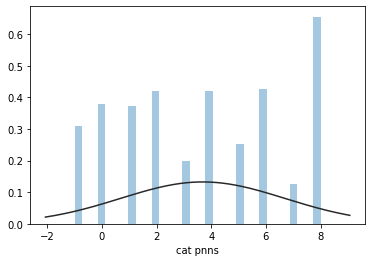

In [8]:
#distplot
for col in df.select_dtypes('number'):
    sns.distplot(df[col], fit=norm, kde=False)
    plt.show()

In [9]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df.select_dtypes('number'):
    w, pvalue = st.shapiro(df[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

fat_100g-------------------------------------------------------------- 0.7149180173873901 0.0
On rejette H0 : la distribution ne suit pas une loi normale
sugars_100g----------------------------------------------------------- 0.7523368000984192 0.0
On rejette H0 : la distribution ne suit pas une loi normale
energy_100g----------------------------------------------------------- 0.8907100558280945 0.0
On rejette H0 : la distribution ne suit pas une loi normale
carbohydrates_100g---------------------------------------------------- 0.8318150639533997 0.0
On rejette H0 : la distribution ne suit pas une loi normale
saturated-fat_100g---------------------------------------------------- 0.6816442012786865 0.0
On rejette H0 : la distribution ne suit pas une loi normale
fiber_100g------------------------------------------------------------ 0.5979804396629333 0.0
On rejette H0 : la distribution ne suit pas une loi normale
proteins_100g--------------------------------------------------------- 0.875

fat_100g


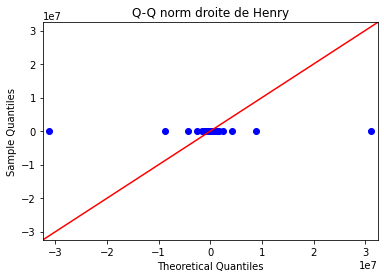

sugars_100g


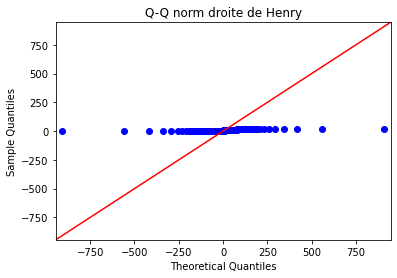

energy_100g


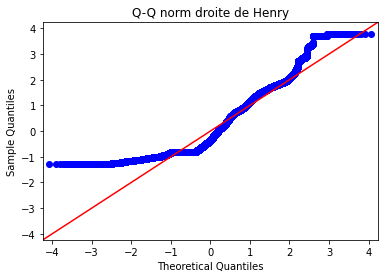

carbohydrates_100g


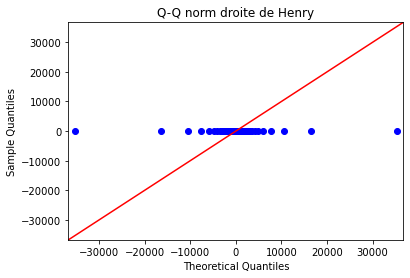

saturated-fat_100g


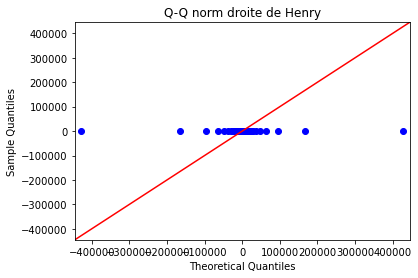

fiber_100g


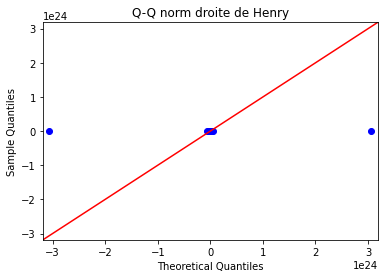

proteins_100g


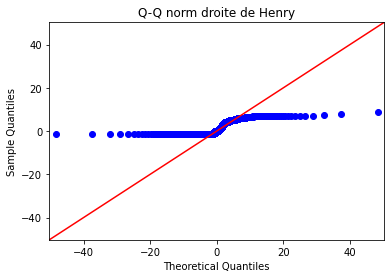

salt_100g


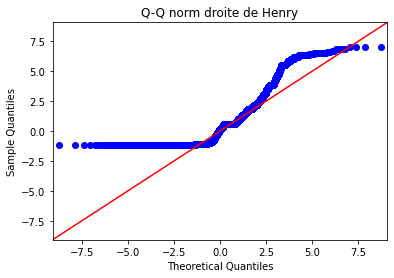

cat pnns


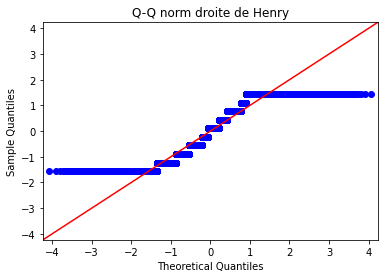

In [10]:
#qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('number'):
    sm.qqplot(df[col],stats.t, fit=True, line="45")
    plt.title("Q-Q norm droite de Henry")
    print(col)
    plt.show()

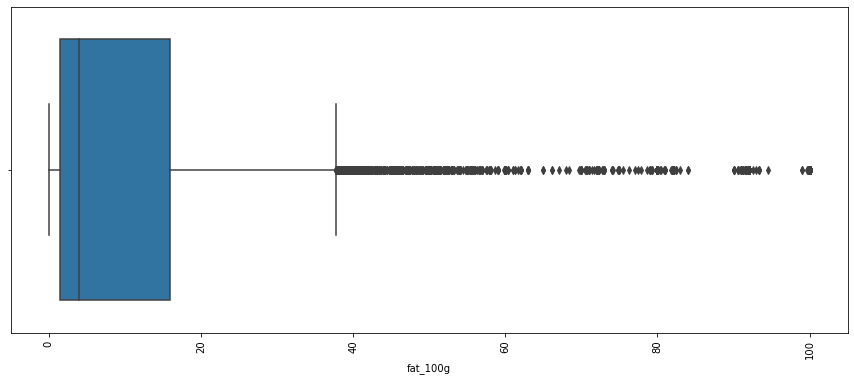

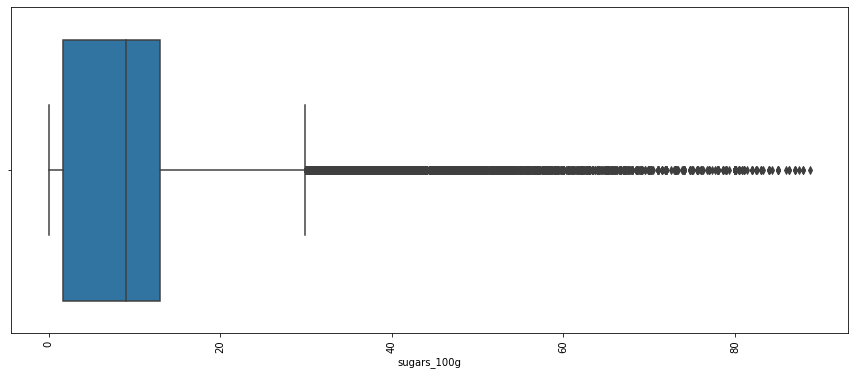

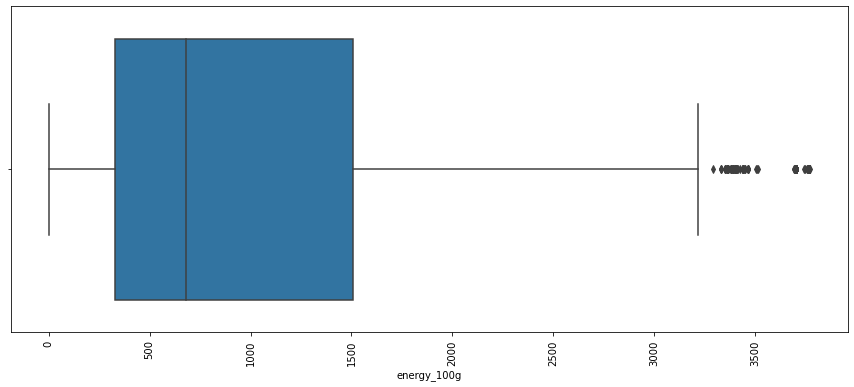

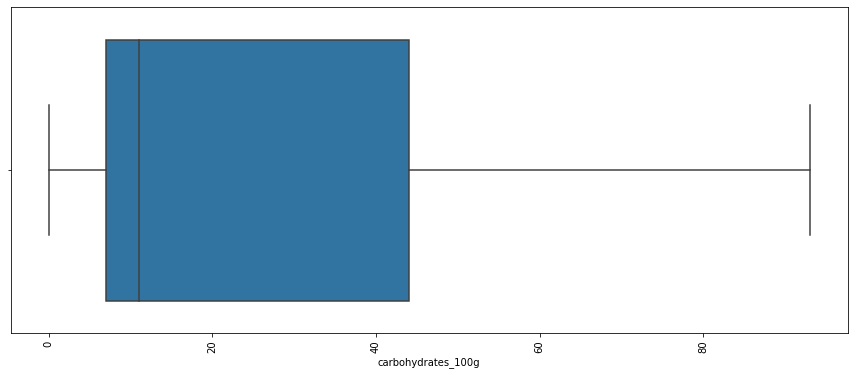

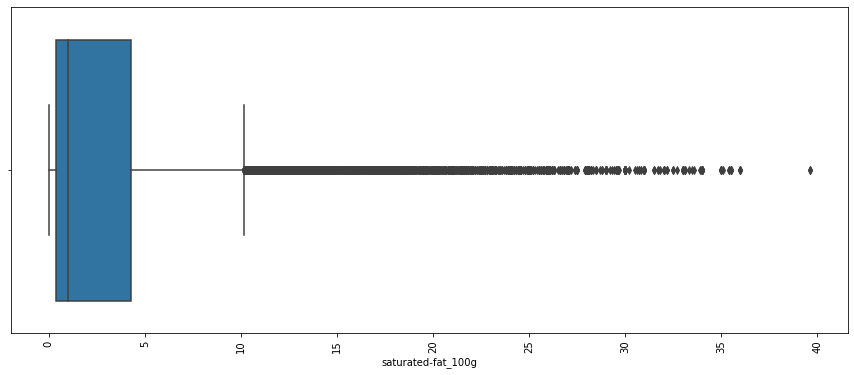

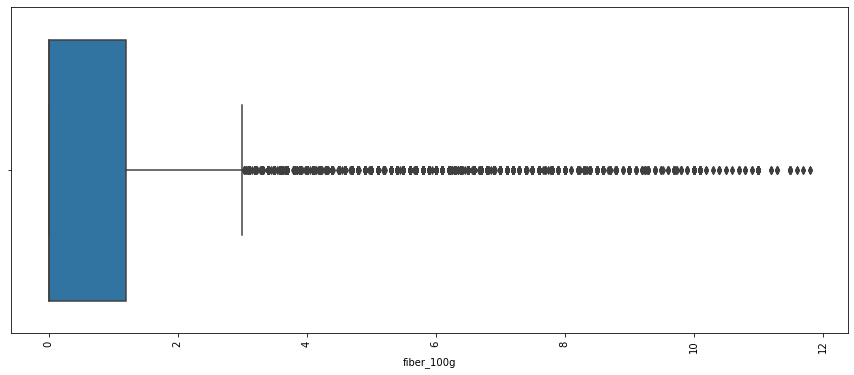

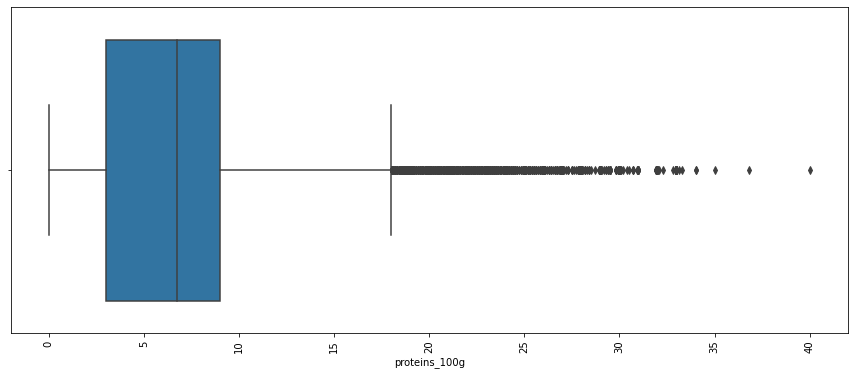

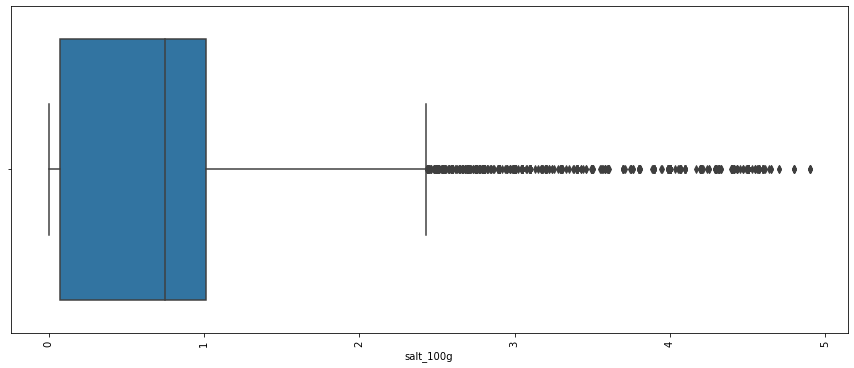

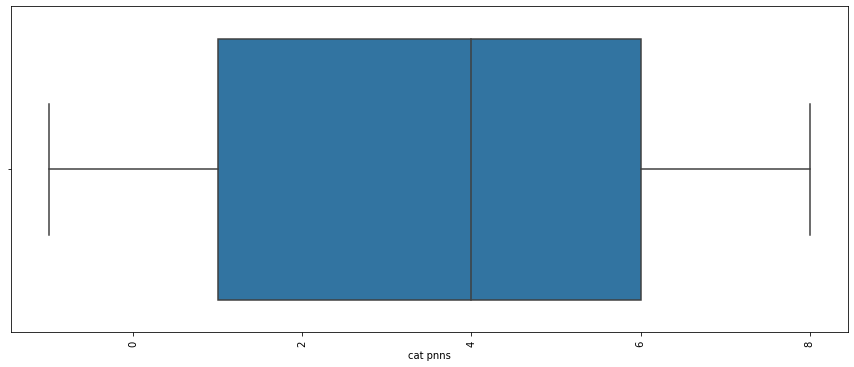

In [11]:
for col in df.select_dtypes('number'):
    plt.figure(figsize=(15,6))
    sns.boxplot(df[col])
    plt.xticks(rotation=90)
    plt.show()

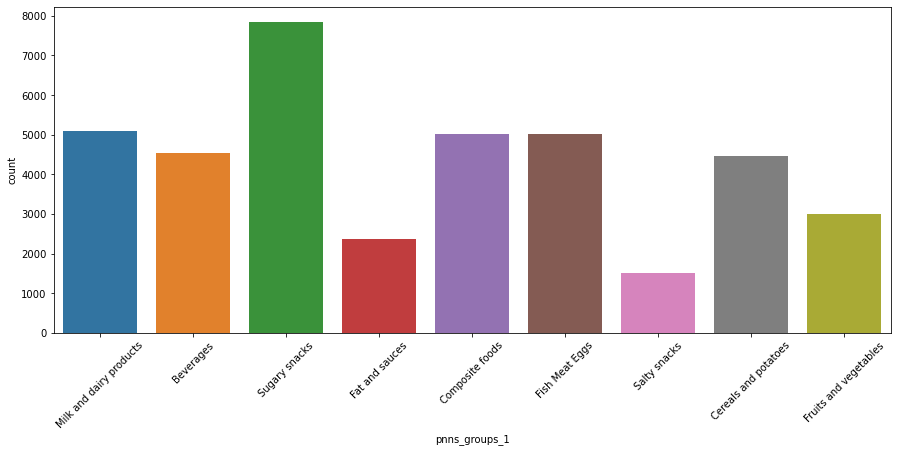

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x="pnns_groups_1",data=df)
plt.xticks(rotation=45)
plt.show()

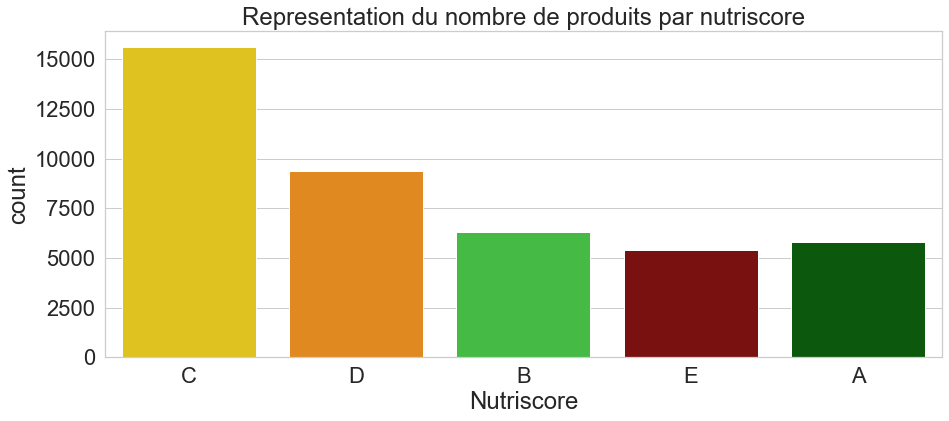

In [154]:
# Representation du nombre de produits par nutriscore
colors = ['gold', 'darkorange','limegreen', 'darkred','darkgreen']
plt.figure(figsize=(15,6))
sns.countplot(x="nutrition_grade_fr",data=df, palette=colors)
plt.title('Representation du nombre de produits par nutriscore')
plt.xlabel('Nutriscore')
plt.show()

# Analyse Bivariée

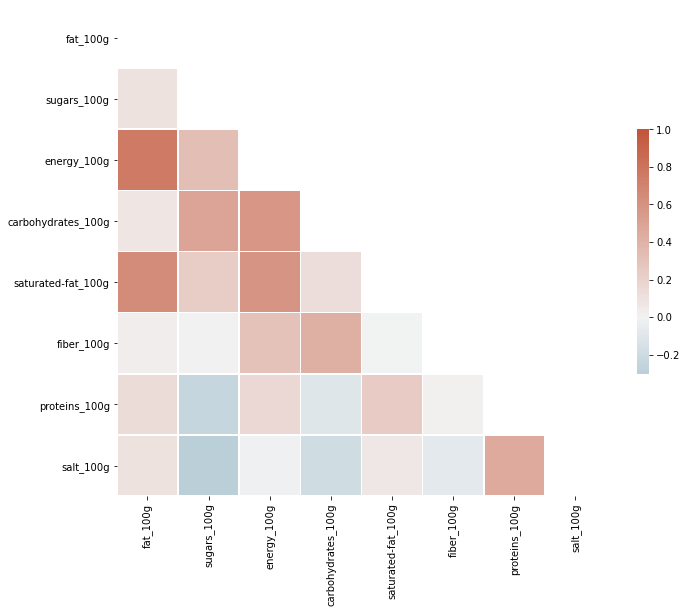

In [14]:
# Compute the correlation matrix
corr = df[['fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

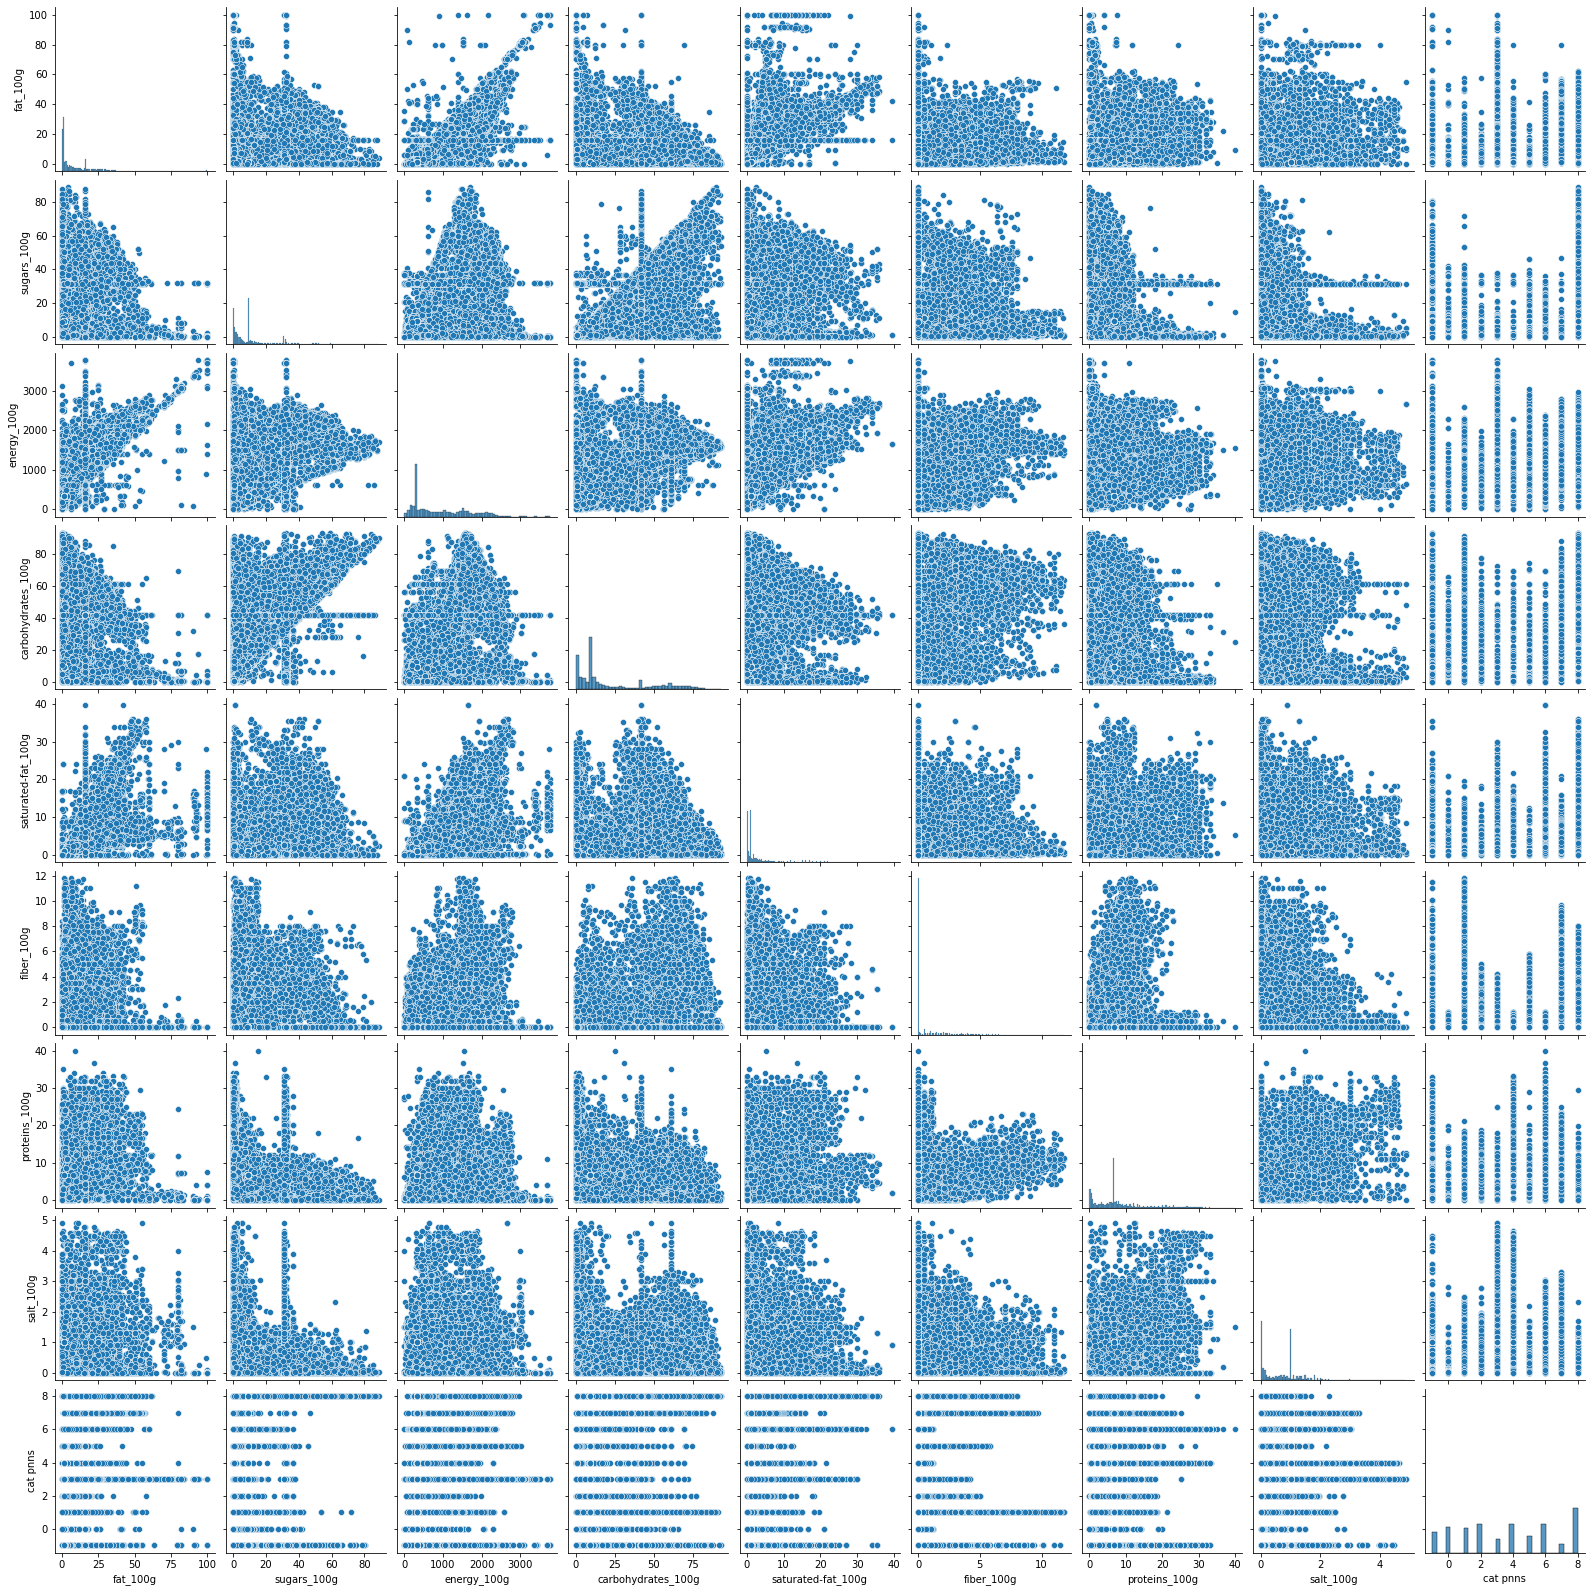

In [15]:
sns.pairplot(df)

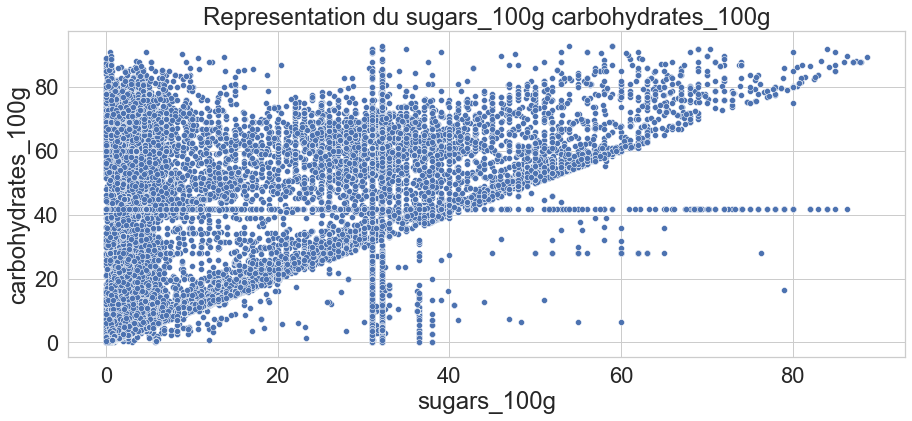

In [152]:
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=df, 
    x='sugars_100g', 
    y='carbohydrates_100g')

plt.title('Representation du sugars_100g carbohydrates_100g')
plt.xlabel('sugars_100g')
plt.ylabel('carbohydrates_100g')
plt.show()

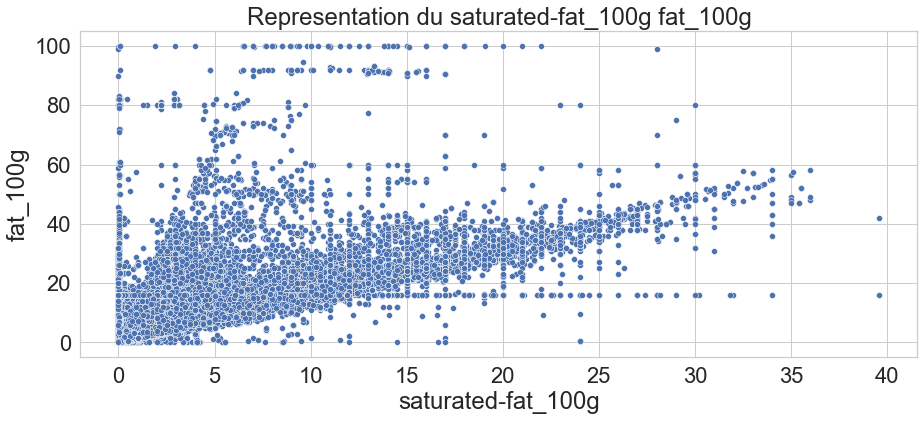

In [153]:
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=df, 
    x='saturated-fat_100g', 
    y='fat_100g')

plt.title('Representation du saturated-fat_100g fat_100g')
plt.xlabel('saturated-fat_100g')
plt.ylabel('fat_100g')
plt.show()

In [16]:
# les moyennes des nutrition_grade par features
df_gb = df.groupby(["nutrition_grade_fr"]).mean()
df_gb

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
nutrition_grade_fr                                                            
A                    2.970020     4.471107   712.224024           27.688814   
B                    6.663903     9.790613   679.124442           19.467992   
C                    5.352871     8.940715   580.649988           16.538341   
D                   18.161597    14.490223  1346.770087           30.488594   
E                   27.247661    27.535244  1881.869757           40.924167   

                    saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
nutrition_grade_fr                                                             
A                             0.622007    2.262048       6.936985   0.326593   
B                             1.269727    0.730657       6.607926   0.479026   
C                             1.619846    0.542703       6.967837   0.859148   
D                             6.989644    0.846681       8.769803   0.930952   
E                            12.007937    0.950106       7.593510   0.849107   

                    cat pnns  
nutrition_grade_fr            
A                   2.515240  
B                   3.000000  
C                   3.197724  
D                   4.523179  
E                   5.730548

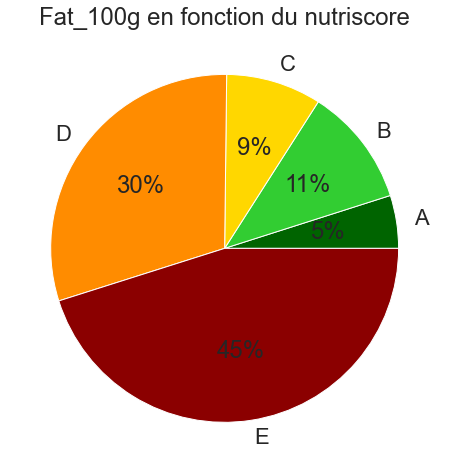

In [140]:
# declaring data
data = df_gb['fat_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Fat_100g en fonction du nutriscore')  
# displaying chart
plt.show()

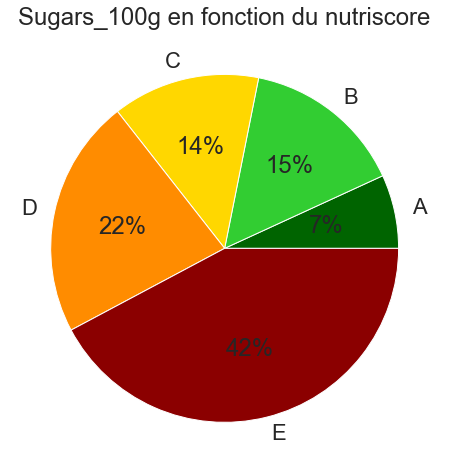

In [139]:
# declaring data
data = df_gb['sugars_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Sugars_100g en fonction du nutriscore')  
# displaying chart
plt.show()

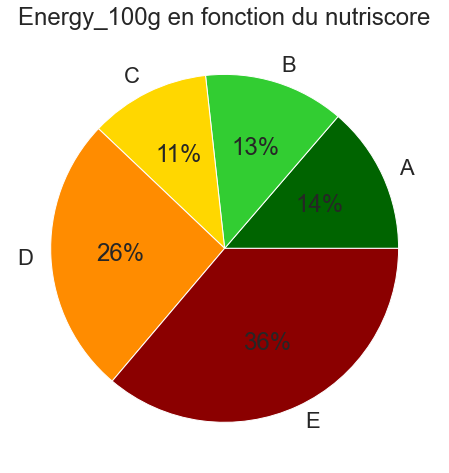

In [138]:
# declaring data
data = df_gb['energy_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Energy_100g en fonction du nutriscore')  
# displaying chart
plt.show()

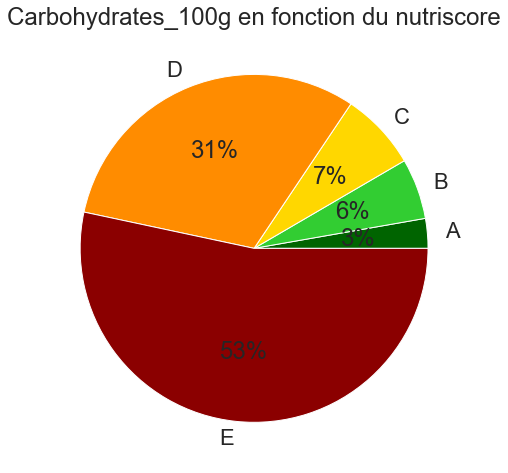

In [137]:
# declaring data
data = df_gb['saturated-fat_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Carbohydrates_100g en fonction du nutriscore')  
# displaying chart
plt.show()

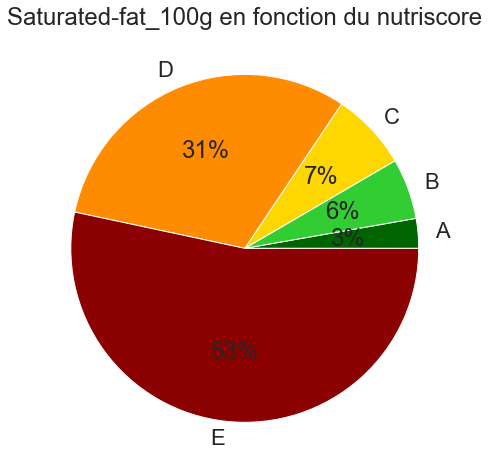

In [136]:
# declaring data
data = df_gb['saturated-fat_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Saturated-fat_100g en fonction du nutriscore')  
# displaying chart
plt.show()

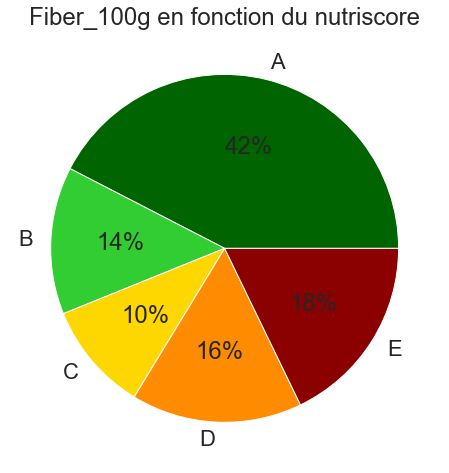

In [135]:
# declaring data
data = df_gb['fiber_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Fiber_100g en fonction du nutriscore')  
# displaying chart
plt.show()

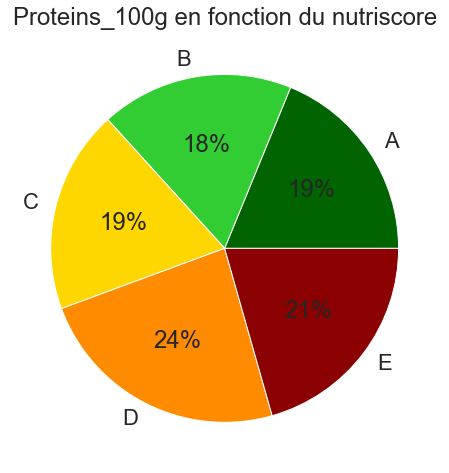

In [134]:
# declaring data
data = df_gb['proteins_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Proteins_100g en fonction du nutriscore')  
# displaying chart
plt.show()

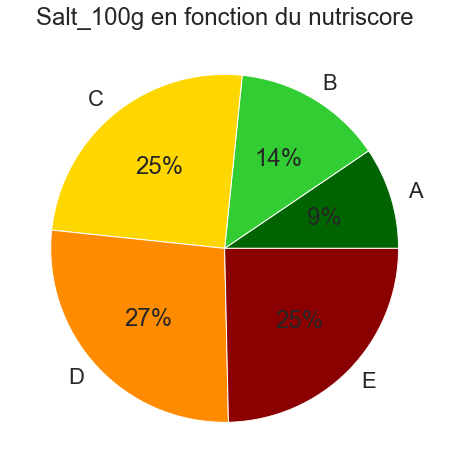

In [133]:
# declaring data
data = df_gb['salt_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Salt_100g en fonction du nutriscore')  
# displaying chart
plt.show()

#### Nutrition grade _ fat_100g

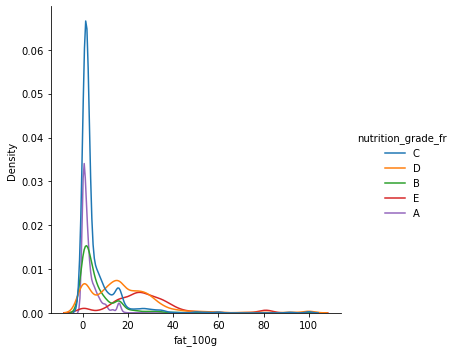

In [17]:
sns.displot(data=df, x="fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

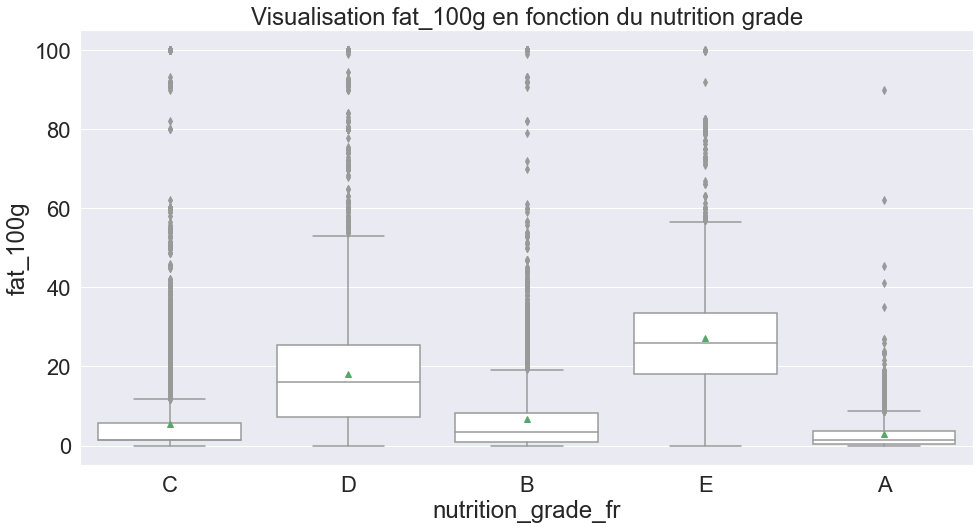

In [18]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fat_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ sugars_100g

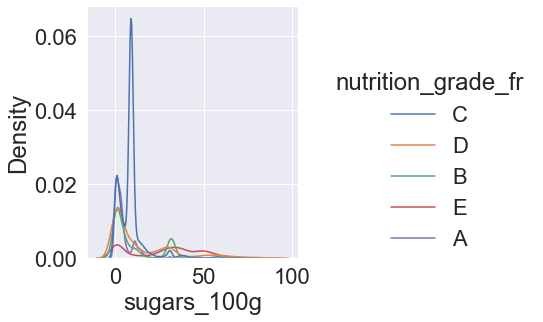

In [19]:
sns.displot(data=df, x="sugars_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

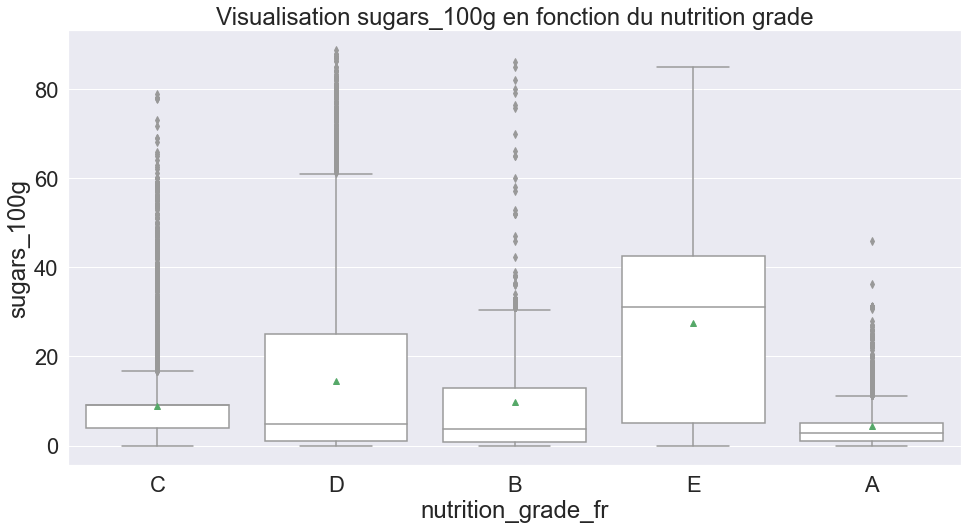

In [20]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="sugars_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation sugars_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ energy_100g

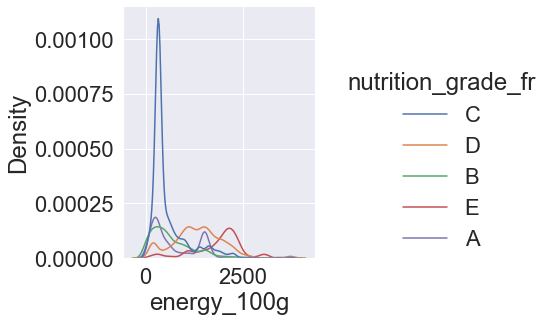

In [21]:
sns.displot(data=df, x="energy_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

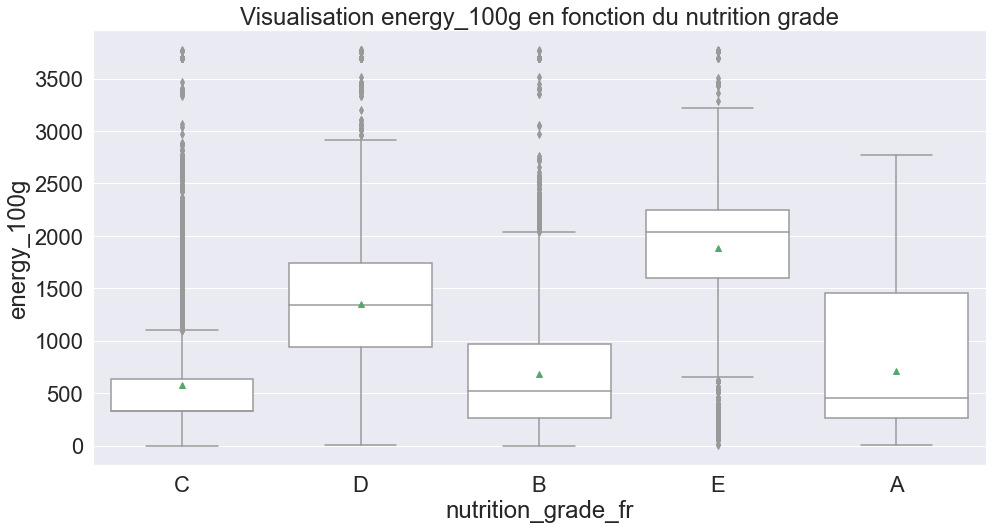

In [22]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation energy_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ carbohydrates_100g

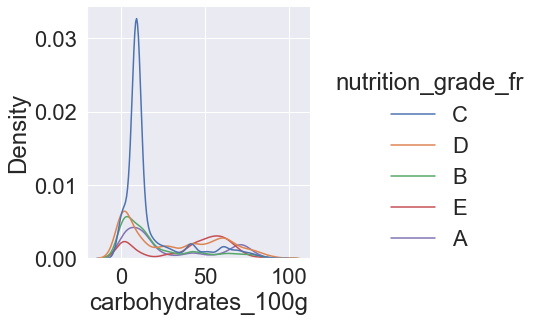

In [23]:
sns.displot(data=df, x="carbohydrates_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

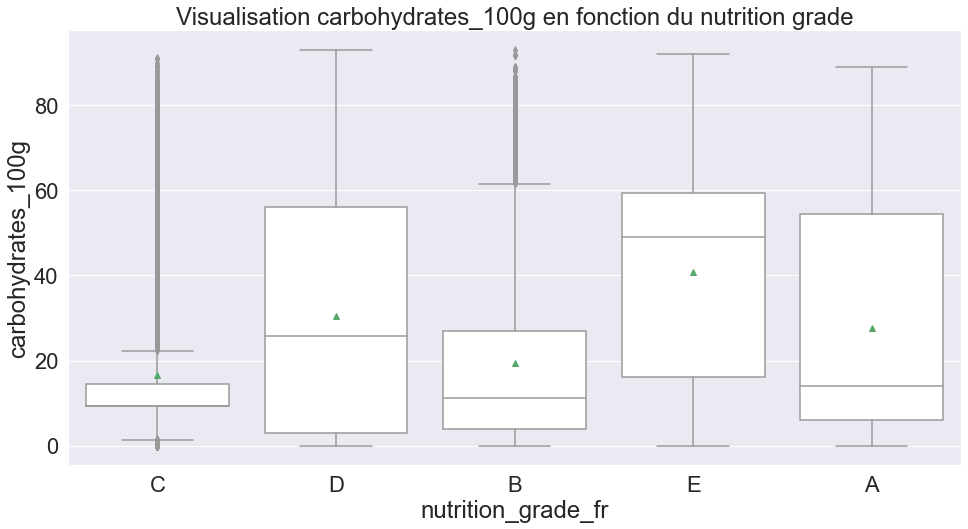

In [24]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="carbohydrates_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ saturated-fat_100g

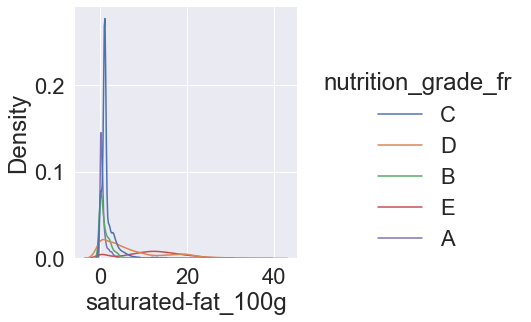

In [25]:
sns.displot(data=df, x="saturated-fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

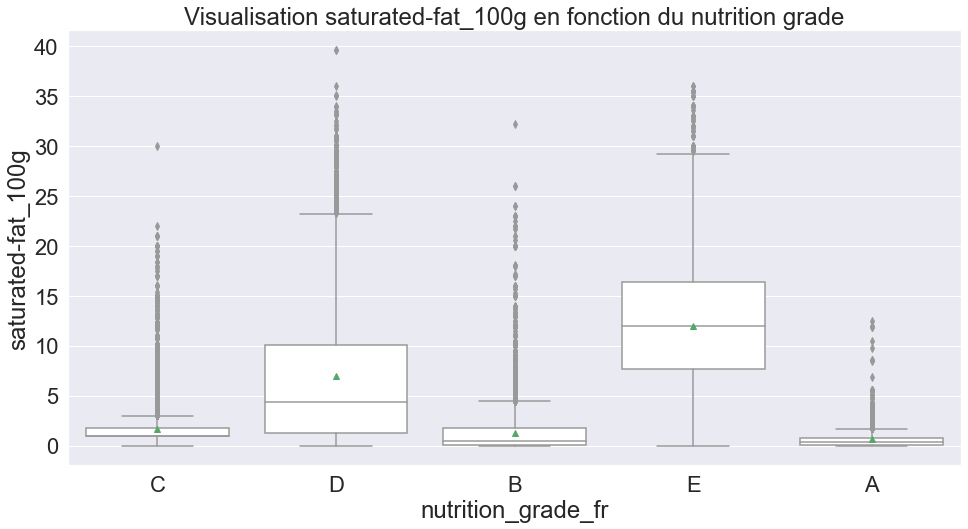

In [26]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="saturated-fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation saturated-fat_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ fiber_100g 

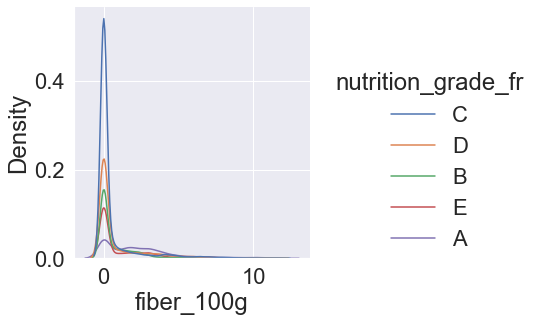

In [27]:
sns.displot(data=df, x="fiber_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

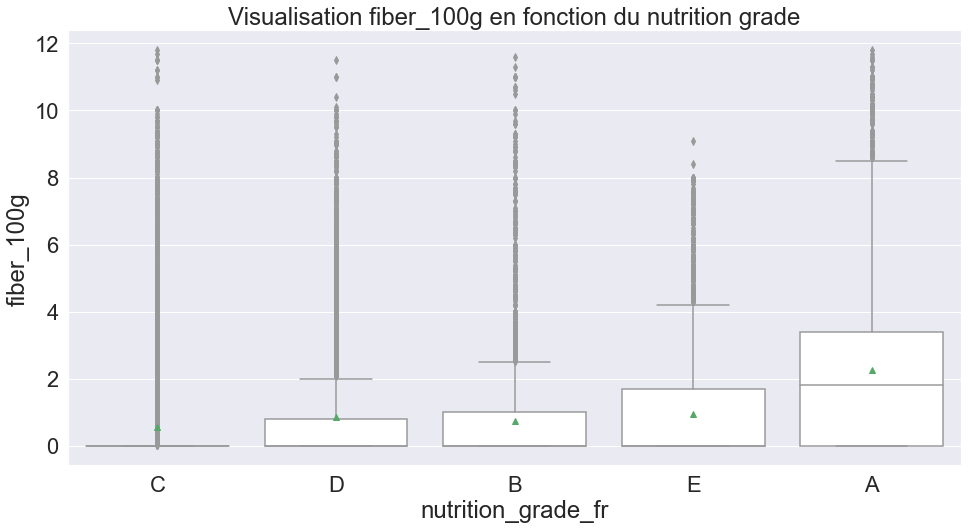

In [28]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fiber_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fiber_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ proteins_100g   

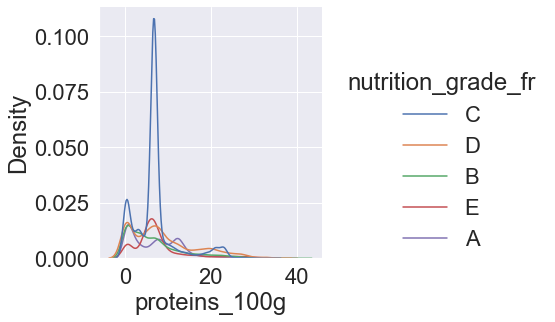

In [29]:
sns.displot(data=df, x="proteins_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

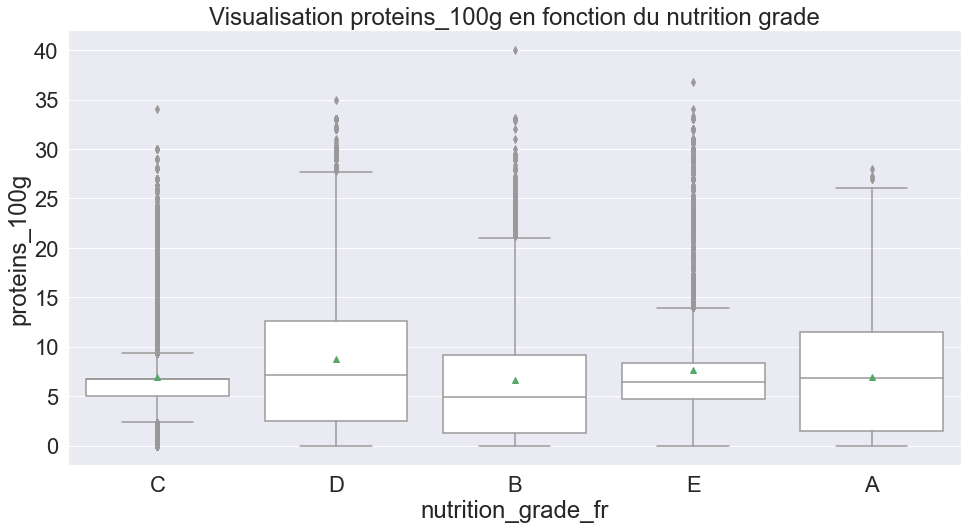

In [30]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="proteins_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation proteins_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ salt_100g 

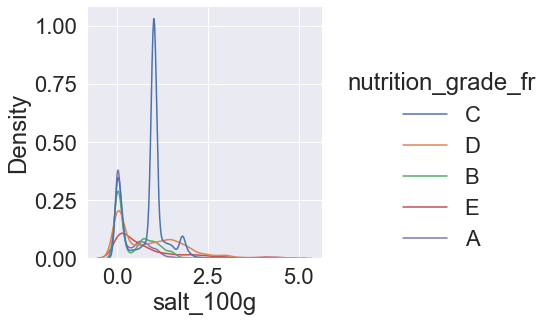

In [31]:
sns.displot(data=df, x="salt_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

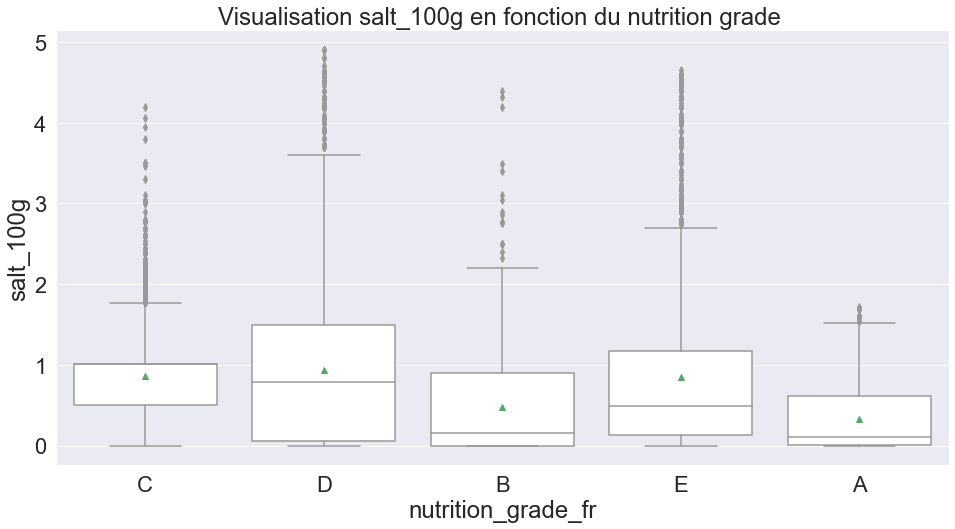

In [32]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="salt_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation salt_100g en fonction du nutrition grade ")
plt.show()

In [33]:
df = df[['product_name','fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g','nutrition_grade_fr']]

# Standardisation

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm = df_norm.select_dtypes('float')
df_norm = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns)
df_norm.head()

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  saturated-fat_100g  \
0 -0.534509    -0.236725    -0.631342           -0.659030           -0.328266   
1 -0.739685    -0.156331    -1.031865           -0.597845           -0.668549   
2 -0.684971     2.945572     0.579637            2.094300           -0.651535   
3  0.238317     1.491764     0.926399            1.404948            0.386328   
4  0.764934     1.344374     1.146822            1.115338           -0.664296   

   fiber_100g  proteins_100g  salt_100g  
0   -0.519938       0.908747   1.731063  
1   -0.519938      -1.114676  -0.984972  
2    2.181079      -1.066114  -0.957345  
3    0.943113      -0.305307  -0.295623  
4   -0.519938      -0.224370  -1.026333

fat_100g


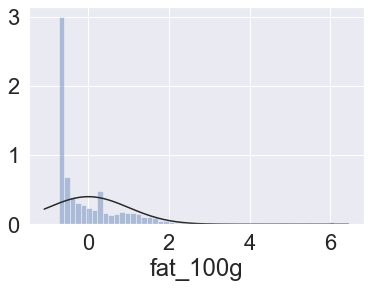

sugars_100g


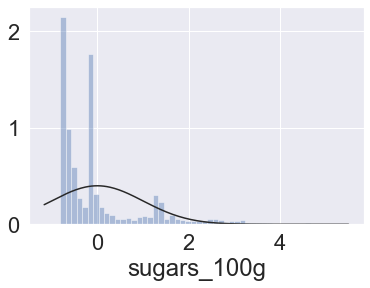

energy_100g


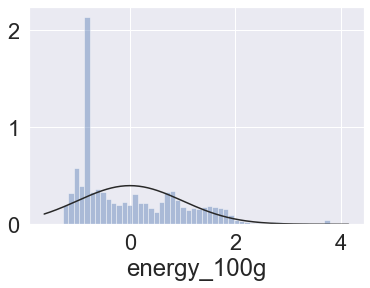

carbohydrates_100g


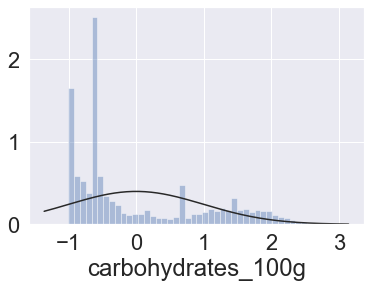

saturated-fat_100g


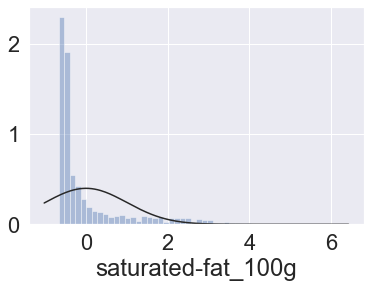

fiber_100g


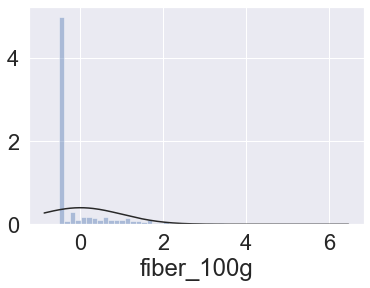

proteins_100g


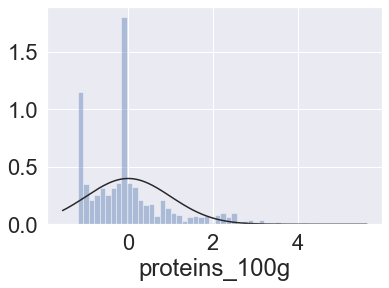

salt_100g


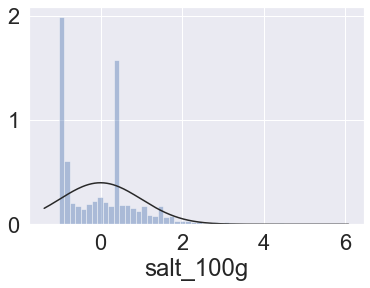

In [36]:
# verification de la distribution gausienne, test de normalité
for col in df_norm.select_dtypes('number'):
    plt.figure()
    sns.distplot(df_norm[col], fit=norm, kde=False)
    print(col)
    plt.show()

fat_100g


<Figure size 432x288 with 0 Axes>

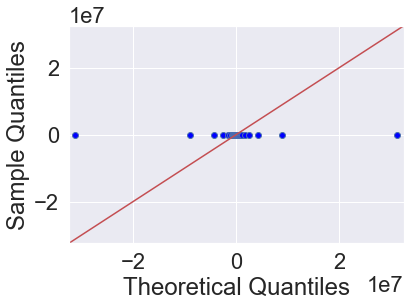

sugars_100g


<Figure size 432x288 with 0 Axes>

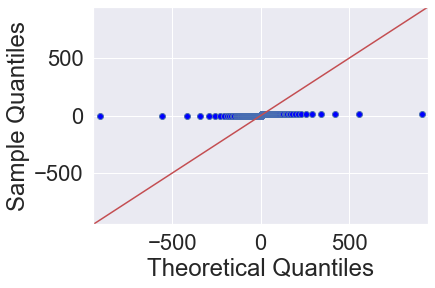

energy_100g


<Figure size 432x288 with 0 Axes>

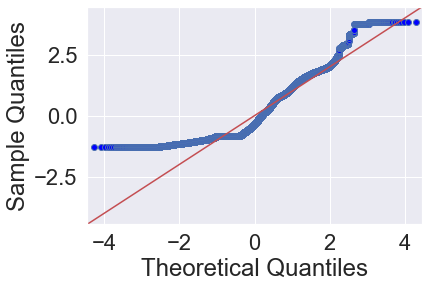

carbohydrates_100g


<Figure size 432x288 with 0 Axes>

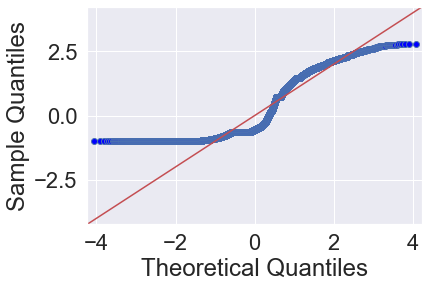

saturated-fat_100g


<Figure size 432x288 with 0 Axes>

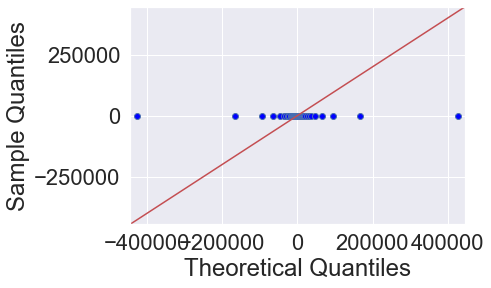

fiber_100g


<Figure size 432x288 with 0 Axes>

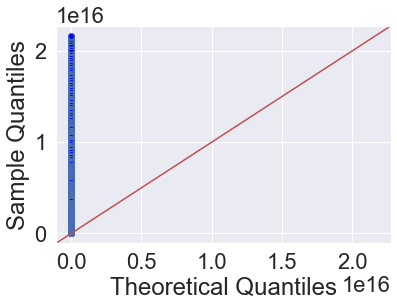

proteins_100g


<Figure size 432x288 with 0 Axes>

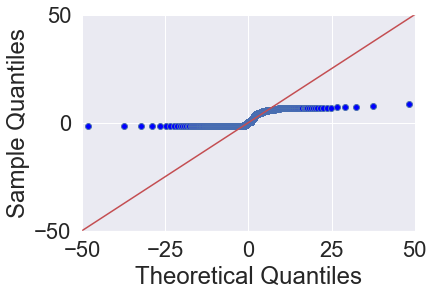

salt_100g


<Figure size 432x288 with 0 Axes>

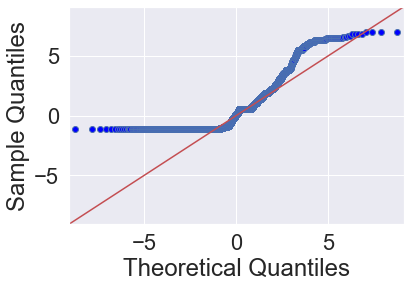

In [37]:
for col in df_norm:
    plt.figure()
    sm.qqplot(df_norm[col], st.t, fit=True, line="45")
    print(col)
    plt.show()

# Tests d'hypothèses 

Nous utiliserons la statistique inférentielle pour interpreter nos données afin d'aquérir une meilleure connaissance

Les tests parametriques :

ANOVA : Comparaison de plusieurs moyennes

Test parametrique ANOVA (puissant pour savoir si nous pouvons oui ou non rejeter H0)

In [40]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [41]:
df_nutri_grade = df['nutrition_grade_fr']

In [42]:
df_test = pd.concat([df_norm, df_nutri_grade], axis=1)

In [43]:
df_test

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
0     -0.534509    -0.236725    -0.631342           -0.659030   
1     -0.739685    -0.156331    -1.031865           -0.597845   
2     -0.684971     2.945572     0.579637            2.094300   
3      0.238317     1.491764     0.926399            1.404948   
4      0.764934     1.344374     1.146822            1.115338   
...         ...          ...          ...                 ...   
42516 -0.219907    -0.752592    -0.437800           -0.463238   
42517 -0.712328    -0.792790     0.748986            2.273777   
42518 -0.637097    -0.196528    -0.831603           -0.628438   
42519 -0.705489    -0.672198     0.048742            0.707437   
42520 -0.739685    -0.243425    -1.025145           -0.565213   

       saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
0               -0.328266   -0.519938       0.908747   1.731063   
1               -0.668549   -0.519938      -1.114676  -0.984972   
2               -0.651535    2.181079      -1.066114  -0.957345   
3                0.386328    0.943113      -0.305307  -0.295623   
4               -0.664296   -0.519938      -0.224370  -1.026333   
...                   ...         ...            ...        ...   
42516           -0.277224   -0.519938      -0.111058   0.186921   
42517           -0.651535    0.042774      -0.111058  -1.008403   
42518           -0.498408   -0.519938      -0.102964   0.373046   
42519           -0.668549   -0.519938      -0.709992  -0.781200   
42520           -0.668549   -0.519938      -1.195613  -0.971185   

      nutrition_grade_fr  
0                      C  
1                      C  
2                      C  
3                      D  
4                      B  
...                  ...  
42516                  B  
42517                  A  
42518                  C  
42519                  A  
42520                  D  

[42521 rows x 9 columns]

#### Les variables energy_100g d'un produit et le nutriscore

In [44]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables energy_100g d'un produit et le nutriscore obtenu sont indépendantes
# Ha: l'hypothèse alternative: Les variables energy_100g d'un produit et le nutriscore obtenu sont corrélées

In [45]:
linear_model = ols('energy_100g ~ C(nutrition_grade_fr)', data=df_test).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

                             sum_sq       df            F  PR(>F)
C(nutrition_grade_fr)  16395.151025      4.0  6670.177892     0.0
Residual               26125.848975  42516.0          NaN     NaN


In [46]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

Ici la p-value est égale à 0.0


In [47]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

On rejette H0 : il y a une corrélation


In [48]:
#df.set_index('product_name',inplace=True)

# Analyse en Composantes Principales 

 l'ACP est une méthode statistique qui permet de représenter les données sur un graphique facilement interprétables.

In [49]:
from sklearn.decomposition import PCA
from sklearn import decomposition
from pyensae.graphhelper import Corrplot

## Diagramme éboulis des valeurs propres
Les pourcentages d’inertie nous donnent une information sur la « structure » de nos données.

Text(0.5, 1.0, 'Eboulis des valeurs propres')

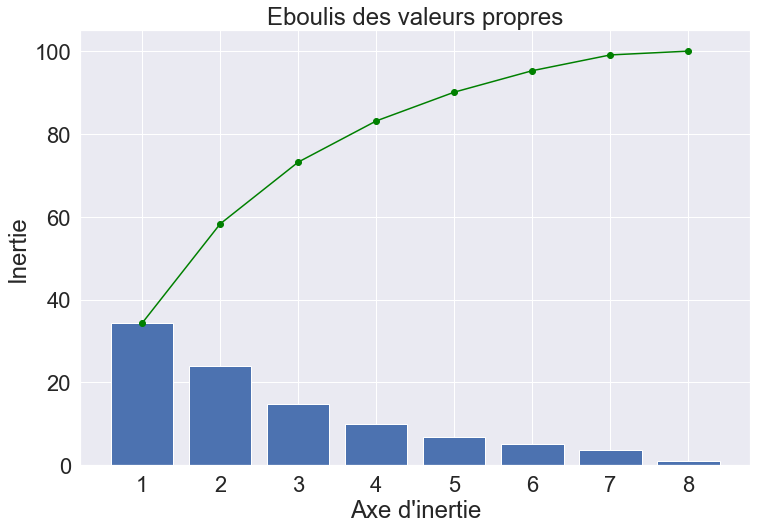

In [50]:
X = df.select_dtypes(include=['float64'])
X_scaled = scaler.fit_transform(X)

pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled) 

var_expl = pca.explained_variance_ratio_*100

plt.figure(figsize=(12,8))
plt.bar(np.arange(len(var_expl))+1, var_expl)
plt.plot(np.arange(len(var_expl))+1, var_expl.cumsum(),c="green",marker='o')
plt.xlabel("Axe d'inertie")
plt.ylabel("Inertie")
plt.title("Eboulis des valeurs propres")

In [51]:
pca = PCA(n_components=4)
Principal_components=pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2','PC 3', 'PC 4'])
print(pca_df)

           PC 1      PC 2      PC 3      PC 4
0     -1.175253  1.526400  0.402022 -1.090651
1     -1.636390 -1.157496 -0.807786  0.480805
2      1.808105 -3.666669  1.328126 -1.011611
3      1.960449 -1.348014  0.476528 -0.548896
4      1.451854 -1.375592 -0.615713 -0.519136
...         ...       ...       ...       ...
42516 -0.991540  0.434668 -0.206095  0.231574
42517  0.491427 -1.430801  1.126768 -0.038285
42518 -1.405822  0.184452 -0.202882 -0.304923
42519 -0.641272 -1.043428  0.001362  0.248904
42520 -1.653001 -1.169775 -0.794733  0.547083

[42521 rows x 4 columns]


In [52]:
for_visual = pd.concat([pca_df, df['nutrition_grade_fr']], axis = 1)
print(for_visual)

           PC 1      PC 2      PC 3      PC 4 nutrition_grade_fr
0     -1.175253  1.526400  0.402022 -1.090651                  C
1     -1.636390 -1.157496 -0.807786  0.480805                  C
2      1.808105 -3.666669  1.328126 -1.011611                  C
3      1.960449 -1.348014  0.476528 -0.548896                  D
4      1.451854 -1.375592 -0.615713 -0.519136                  B
...         ...       ...       ...       ...                ...
42516 -0.991540  0.434668 -0.206095  0.231574                  B
42517  0.491427 -1.430801  1.126768 -0.038285                  A
42518 -1.405822  0.184452 -0.202882 -0.304923                  C
42519 -0.641272 -1.043428  0.001362  0.248904                  A
42520 -1.653001 -1.169775 -0.794733  0.547083                  D

[42521 rows x 5 columns]


## Répresentation des individus

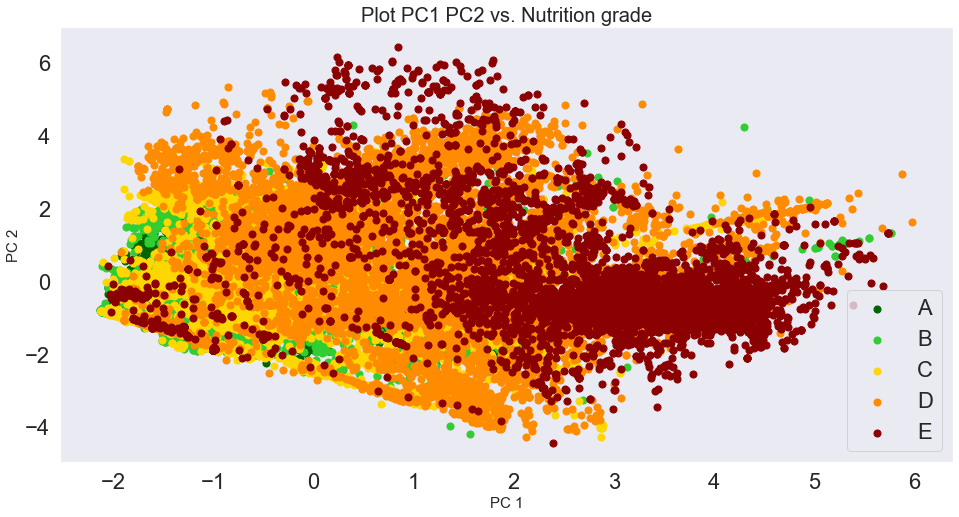

In [85]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot PC1 PC2 vs. Nutrition grade', fontsize = 20)
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
for nutrition_grade_fr, color in zip(nutrition_grade,colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(nutrition_grade)
ax.grid()

In [54]:
# import random
import random

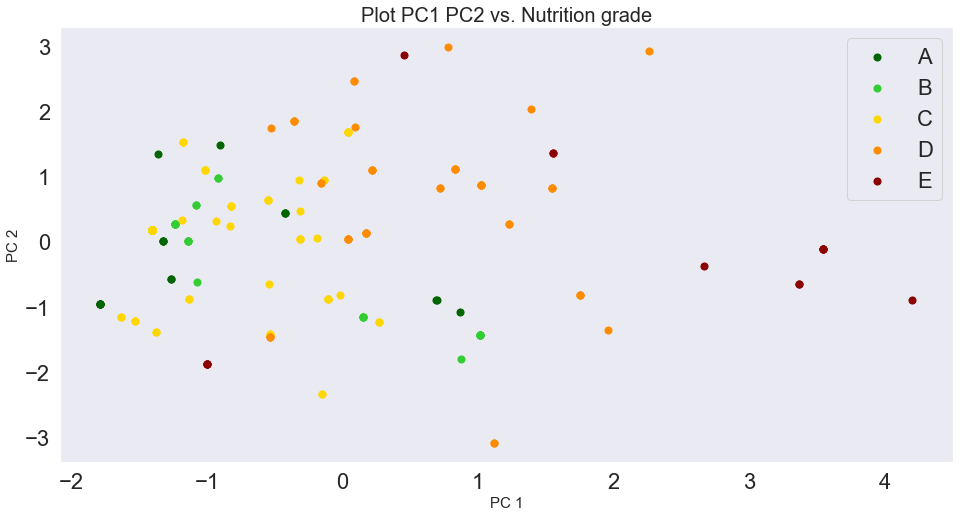

In [91]:
# Choose how many index include for random selection
random_raw = np.random.choice(100, replace=True, size=200)

for_visual_random = for_visual.iloc[random_raw]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 2', fontsize=15)
ax.set_title('Plot PC1 PC2 vs. Nutrition grade', fontsize=20)
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
for nutrition_grade_fr, color in zip(nutrition_grade, colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual_random.loc[indicesToKeep, 'PC 1'],
               for_visual_random.loc[indicesToKeep, 'PC 2'], c=color, s=50)
ax.legend(nutrition_grade)
ax.grid()

In [56]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.34320797 0.23960014 0.14920258 0.09943107]
Cumulative Prop. Variance Explained:  [0.34320797 0.5828081  0.73201069 0.83144176]


Les 4 premières composantes expliquent 83% de la variance totale des données. On peut donc dire que la dimension intrasèques de cet ensemble de données est raisonnablement égale à 4. Transformons donc la dataframe originelle en une dataframe de 4 variables

## Cercle des corrélations

In [57]:
 def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig=plt.figure(figsize=(10,16))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='#17aafa', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

In [58]:
features = X.columns
features

Index(['fat_100g', 'sugars_100g', 'energy_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'],
      dtype='object')

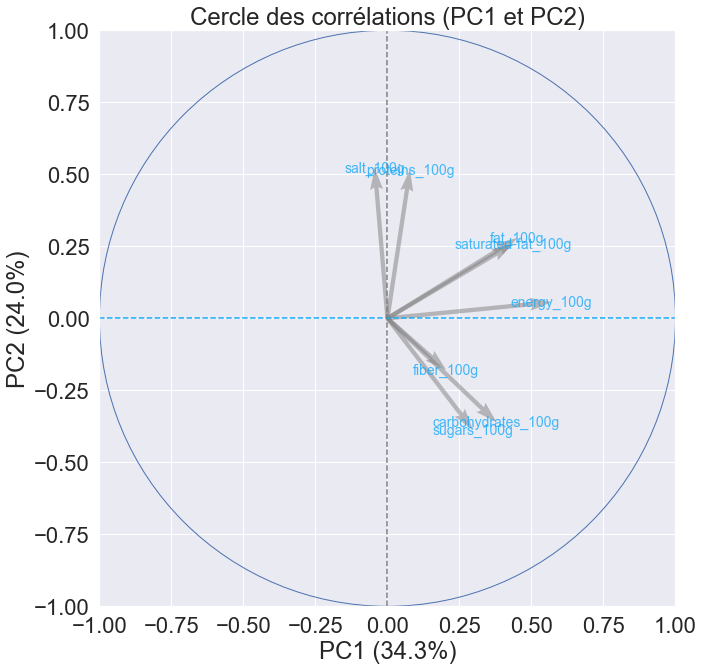

In [62]:
n_comp = 2
pcs = pca.components_
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))

* F1 : le gras (fat + saturated_fat) et le sel
* F2 : le sucre (sugars + carbohydrates)

In [86]:
couleurs = {'A': 'darkgreen', 'B': 'limegreen',
            'C': 'gold', 'D': 'darkorange', 'E': 'darkred'}

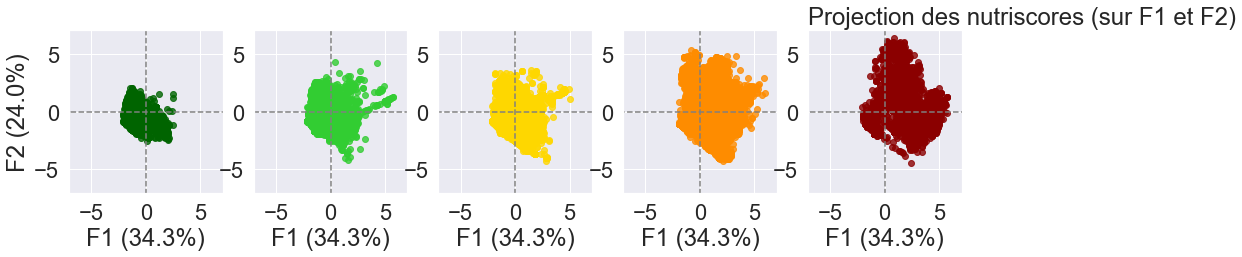

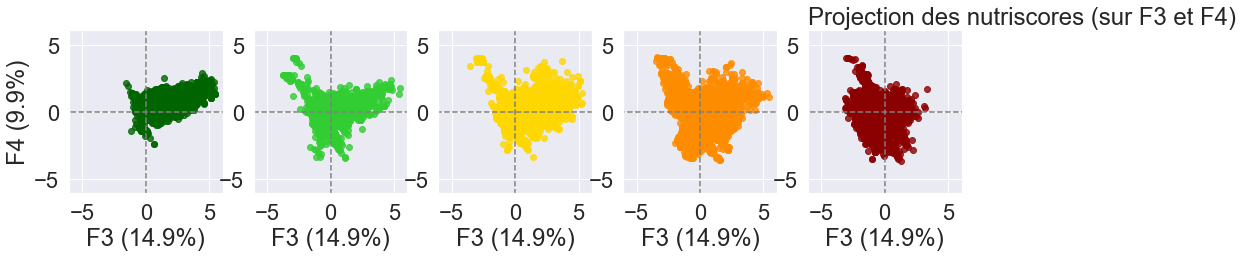

In [90]:
# Projection des individus
X_projected = pca.transform(X_scaled)
nutriscores = for_visual[for_visual['nutrition_grade_fr'].notna(
)]['nutrition_grade_fr']
for d1, d2 in [(0, 1), (2, 3)]:
    if d2 < 4:

        # initialisation de la figure
        fig = plt.figure(figsize=(16, 3))

        # affichage des points
        pos = 1
        for value in np.unique(nutriscores):
            selected = np.where(nutriscores == value)
            plt.subplot(1, 5, pos)
            plt.scatter(X_projected[selected, d1], X_projected[selected,
                        d2], alpha=0.8, label=value, c=couleurs[value])

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            if pos == 1:
                plt.ylabel('F{} ({}%)'.format(
                    d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))
            pos += 1

        plt.title("Projection des nutriscores (sur F{} et F{})".format(
            d1+1, d2+1), loc='left')
        plt.show()